# Proyek Akhir: Image Classification Model Deployment

---

### Dicoding Submission
### Belajar Pengembangan Machine Learning

---

Kriteria submission:
- Dataset yang akan dipakai bebas, namun minimal memiliki **1000 buah gambar**.
- Dataset **tidak pernah** digunakan pada submission kelas machine learning sebelumnya.
- Dataset harus dibagi menjadi **`80% train set`** dan **`20% test set`**.
- Model harus menggunakan **model sequential**.
- Model harus menggunakan **Conv2D Maxpooling Layer**.
- **Akurasi** pada training dan validation set **minimal sebesar 80%**.
- Menggunakan **Callback**.
- Membuat **plot** terhadap akurasi dan loss model
- Menulis kode untuk menyimpan model ke dalam format **TF-Lite**.

---

Saran dan Tips:
- Dataset yang digunakan berisi lebih dari 2000 gambar.
- Mengimplementasikan **Callback**.
- Gambar-gambar pada dataset memiliki **resolusi yang tidak seragam.**

---

- **Bintang 3** : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.
- **Bintang 4** : Semua ketentuan terpenuhi, dataset memiliki **minimal 2000** sampel gambar dan **minimal 3 kelas**. Serta akurasi pada training dan validation set **minimal 85%**.
- **Bintang 5** : Semua ketentuan terpenuhi, dataset memiliki **minimal 10000 gambar**, resolusi gambar pada dataset tidak seragam. Serta akurasi pada training set dan validation set **minimal 92%**.

---

# Data Diri

Nama: Andrew Benedictus Jamesie  
E-mail: andrewbjamesie@yahoo.com  

---
---

In [ ]:
import os
import zipfile
import pathlib

!pip install split-folders
import splitfolders as sf

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Kaggle username and key
os.environ['KAGGLE_USERNAME'] = 'andrewbjamesie'
os.environ['KAGGLE_KEY']      = 'c1cefea4cc184cb0d30547be43e5f107'

# Download dataset from Kaggle
!kaggle datasets download -d duttadebadri/image-classification

100% 2.33G/2.34G [00:11<00:00, 141MB/s]
100% 2.34G/2.34G [00:11<00:00, 225MB/s]


In [ ]:
# Unzip the downloaded zip file
localZip = '/content/image-classification.zip'
zipRef = zipfile.ZipFile(localZip, 'r')
zipRef.extractall('image-classification')
zipRef.close()

In [ ]:
# List directory
baseDir = 'image-classification/images/images'
os.listdir(baseDir)

['art and culture', 'architecure', 'travel and  adventure', 'food and d rinks']

In [ ]:
# Rename directory
os.rename(baseDir + '/art and culture',       baseDir + '/art')
os.rename(baseDir + '/architecure',           baseDir + '/archi')
os.rename(baseDir + '/food and d rinks',      baseDir + '/fnb')
os.rename(baseDir + '/travel and  adventure', baseDir + '/travel')

# List renamed directory
os.listdir(baseDir)

['archi', 'fnb', 'art', 'travel']

In [ ]:
# Split directory
sf.ratio(
    baseDir,
    output = os.path.join('image-classification/image'),
    seed   = None,
    ratio  = (0.8, 0.2)
)

Copying files: 35095 files [00:11, 2963.12 files/s]


In [ ]:
# Train and val dir for each archi, art, fnb, travel
imageDir = 'image-classification/image'

trainDirArchi  = os.path.join(imageDir, 'train/archi')
trainDirArt    = os.path.join(imageDir, 'train/art')
trainDirFnb    = os.path.join(imageDir, 'train/fnb')
trainDirTravel = os.path.join(imageDir, 'train/travel')

valDirArchi    = os.path.join(imageDir, 'val/archi')
valDirArt      = os.path.join(imageDir, 'val/art')
valDirFnb      = os.path.join(imageDir, 'val/fnb')
valDirTravel   = os.path.join(imageDir, 'val/travel')

In [ ]:
# Count train and val image
trainSet = (
      len(os.listdir(trainDirArchi))
    + len(os.listdir(trainDirArt))
    + len(os.listdir(trainDirFnb))
    + len(os.listdir(trainDirTravel))
)

valSet = (
      len(os.listdir(valDirArchi))
    + len(os.listdir(valDirArt))
    + len(os.listdir(valDirFnb))
    + len(os.listdir(valDirTravel))
)

print(f'Train Set      : {trainSet}')
print(f'Validation Set : {valSet}')

Train Set      : 28075
Validation Set : 7020


In [ ]:
# List directory of train and validation image
trainDir = os.path.join(imageDir, 'train')
valDir   = os.path.join(imageDir, 'val')

print(os.listdir(trainDir))
print(os.listdir(valDir))

['archi', 'fnb', 'art', 'travel']
['archi', 'fnb', 'art', 'travel']


In [ ]:
# Image Augmentation for duplicating image
trainDatagen = ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 30,
    # width_shift_range  = 0.2,
    # height_shift_range = 0.2,
    shear_range        = 0.2,
    zoom_range         = 0.2,
    horizontal_flip    = True,
    # vertical_flip      = True,
    fill_mode          = 'nearest',
    # validation_split   = 0.2
)

valDatagen = ImageDataGenerator(
    rescale         = 1./255
)

In [ ]:
# Preperation the training and validation data with .flow_from_directory()
trainGen = trainDatagen.flow_from_directory(
    trainDir,
    target_size = (200, 200),
    batch_size  = 50,
    shuffle     = True,
    color_mode  = 'rgb',
    class_mode  = 'categorical',
    # save_format = 'jpeg'
)

valGen = valDatagen.flow_from_directory(
    valDir,
    target_size = (200, 200),
    batch_size  = 50,
    shuffle     = True,
    color_mode  = 'rgb',
    class_mode  = 'categorical',
    # save_format = 'jpeg'
)

Found 28073 images belonging to 4 classes.
Found 7020 images belonging to 4 classes.


In [ ]:
baseModel = Xception(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

baseModel.trainable = False

baseModel.summary()
print(f'Base Model Layer : {len(baseModel.layers)}')

83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

In [ ]:
model = Sequential([
    baseModel,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
# Model architecture
# pre_trained_model = ResNet152V2(
#     weights      = 'imagenet',
#     include_top  = False,
#     input_tensor = Input(shape=(150, 150, 3))
# )

# for layer in pre_trained_model.layers:
#     layer.trainable = False

# model_output = pre_trained_model.output

# m = Flatten(name='flatten')(model_output)
# m = Dropout(0.5)(m)
# m = Dense(128, activation='relu')(m)
# m = Dense(4,   activation='softmax')(m)

# model = Sequential(pre_trained_model.input, m)

# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.layers import BatchNormalization

# model = Sequential([
#     EfficientNetB3(weights="imagenet", include_top=False, pooling='max', input_shape=(200, 200, 3), input_tensor=Input(shape=(200, 200, 3))),
#     BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
#     Dropout(0.25),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(4,   activation='softmax')
#     # Conv2D(64,  (3, 3), activation='relu', input_shape=(200, 200, 3)),
#     # MaxPooling2D(2, 2),
#     # Dropout(0.25),
#     # Conv2D(64,  (3, 3), activation='relu'),
#     # MaxPooling2D(2, 2),
#     # Conv2D(128,  (3, 3), activation='relu'),
#     # MaxPooling2D(2, 2),
#     # Conv2D(256,  (3, 3), activation='relu'),
#     # MaxPooling2D(2, 2),
#     # Conv2D(512,  (3, 3), activation='relu'),
#     # MaxPooling2D(2, 2),
#     # Dropout(0.25),
#     # Flatten(),
#     # Dense(512, activation='relu'),
#     # Dense(4,   activation='softmax')
# ])

# model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    # optimizer = tf.optimizers.Adam(lr=1e-4),
    # optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

In [ ]:
# Stop training callback
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print('\nAccuracy and Validation Accuracy reach > 92%')
            # self.model.stop_training = True

stopTraining = stopCallback()

# ReduceLROnPlateau callback
reduceLROP   = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3)

---

**Cannot connect to GPU backend**


You cannot currently connect to a GPU due to usage limits in Colab. [Learn more](https://research.google.com/colaboratory/faq.html#usage-limits)

If you are interested in priority access to GPUs and higher usage limits, you may want to check out [Colab Pro](https://colab.research.google.com/signup?utm_source=dialog&utm_medium=link&utm_campaign=gpu_assignment_failure).

---



---


**Error ketika training di model.fit()**


```
Epoch 1/30
32/32 - 358s - loss: 1.5903 - accuracy: 0.2189 - val_loss: 1.9429 - val_accuracy: 0.1125 - lr: 1.0000e-04 - 358s/epoch - 11s/step
Epoch 2/30

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))

32/32 - 304s - loss: 1.1308 - accuracy: 0.2762 - val_loss: 1.6228 - val_accuracy: 0.1438 - lr: 1.0000e-04 - 304s/epoch - 9s/step
Epoch 3/30
32/32 - 305s - loss: 0.9584 - accuracy: 0.3191 - val_loss: 1.4837 - val_accuracy: 0.2187 - lr: 1.0000e-04 - 305s/epoch - 10s/step

```


---



In [ ]:
# Model training with .fit()
epoch = 10

history = model.fit(
    trainGen,
    # steps_per_epoch  = 32,
    epochs           = epoch,
    validation_data  = valGen,
    # validation_steps = 5,
    verbose          = 2,
    callbacks        = [stopTraining, ]
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


562/562 - 427s - loss: 0.3557 - accuracy: 0.8815 - val_loss: 0.2708 - val_accuracy: 0.9093 - 427s/epoch - 760ms/step
Epoch 2/10
562/562 - 402s - loss: 0.2674 - accuracy: 0.9108 - val_loss: 0.2512 - val_accuracy: 0.9150 - 402s/epoch - 715ms/step
Epoch 3/10
562/562 - 399s - loss: 0.2497 - accuracy: 0.9160 - val_loss: 0.2393 - val_accuracy: 0.9174 - 399s/epoch - 711ms/step
Epoch 4/10
562/562 - 402s - loss: 0.2377 - accuracy: 0.9186 - val_loss: 0.2358 - val_accuracy: 0.9181 - 402s/epoch - 715ms/step
Epoch 5/10
562/562 - 401s - loss: 0.2308 - accuracy: 0.9204 - val_loss: 0.2322 - val_accuracy: 0.9185 - 401s/epoch - 713ms/step
Epoch 6/10
562/562 - 401s - loss: 0.2278 - accuracy: 0.9217 - val_loss: 0.2301 - val_accuracy: 0.9198 - 401s/epoch - 713ms/step
Epoch 7/10
562/562 - 400s - loss: 0.2207 - accuracy: 0.9247 - val_loss: 0.2355 - val_accuracy: 0.9192 - 400s/epoch - 711ms/step
Epoch 8/10
562/562 - 400s - loss: 0.2188 - accuracy: 0.9230 - val_loss: 0.2331 - val_accuracy: 0.9199 - 400s/epoch 

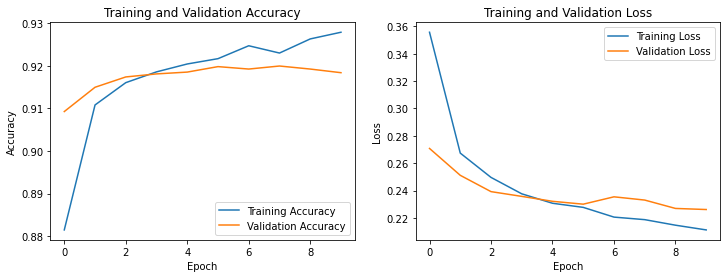

In [ ]:
# Visualize accuracy and loss plot
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(epoch), accuracy,     label='Training Accuracy')
plt.plot(range(epoch), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss,     label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
print(trainGen.class_indices)

{'archi': 0, 'art': 1, 'fnb': 2, 'travel': 3}


Saving 04_Monasterio_de_Palazuelos_absides_exterior_ni.jpg to 04_Monasterio_de_Palazuelos_absides_exterior_ni (2).jpg
04_Monasterio_de_Palazuelos_absides_exterior_ni.jpg
Art and Culture


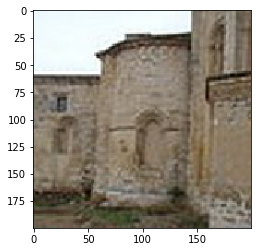

In [ ]:
uploaded = files.upload()

# Predicting images
for up in uploaded.keys():
    path = up
    img  = image.load_img(path, target_size = (200, 200))

    imgplot = plt.imshow(img)
    x       = image.img_to_array(img)
    x       = np.expand_dims(x, axis = 0)

    images  = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(up)

    # if classes[0][0] == 1:
    #     print('Architecture')
    # elif classes[0][1] == 1:
    #     print('Food and Drinks')
    # elif classes[0][2] == 1:
    #     print('Art and Culture')
    # elif classes[0][3] == 1:
    #     print('Travel and Adventure')
    # else:
    #     print('Unclassified')

    if classes == 0:
        print('Architecture')
    elif classes == 1:
        print('Art and Culture')
    elif classes == 2:
        print('Food and Drinks')
    elif classes == 3:
        print('Travel and Adventure')
    else:
        print('Unclassified')

In [ ]:
# Save model to SavedModel format
exportDir = 'saved_model/'
tf.saved_model.save(model, exportDir)

# Convert model to TF-Lite format
converter    = tf.lite.TFLiteConverter.from_saved_model(exportDir)
tflite_model = converter.convert()

# tflite_model_file = pathlib.Path('vegs.tflite')
# tflite_model_file.write_bytes(tflite_model)

# Save the model
with open('model.tflite', 'wb') as t:
    t.write(tflite_model)

---


References:

[(Dicoding) Latihan: Deploy Model ML Menggunakan TensorFlow Lite](https://www.dicoding.com/academies/185/tutorials/10239)

[(Dicoding) Error Saat Memakai Transfer Learning](https://www.dicoding.com/academies/185/discussions/117337)

[(Dicoding) Kesalahan Hasil Prediksi, Sudah Pakai Pre-trained Model (Resnet, Learning Rate) ](https://www.dicoding.com/academies/185/discussions/139707)

[(Dicoding) ValueError: Unknown loss function: categotical_crossentropy](https://www.dicoding.com/academies/185/discussions/131992)

[(Dicoding) Cara Meningkatkan Akurasi?](https://www.dicoding.com/academies/185/discussions/128712)

[(Dicoding) logits and labels must be broadcastable: logits_size=[32,2] labels_size=[32,3]](https://www.dicoding.com/academies/185/discussions/130702)

[(Colab) Pendeteksi_Kebersihan_Lingkungan2.ipynb](https://colab.research.google.com/drive/1XYbPUen-IO6MKYtqRQMg5ypVupCsI_y7?usp=sharing)

[(Colab) ProyekAkhirMLmenengah.ipynb](https://colab.research.google.com/drive/1pa06QfSueDDrjdOlp1TQUGj0DUA8dR6Q?usp=sharing)

[(Colab) Rev2 Final_Submission_ItMG.ipynb](https://colab.research.google.com/drive/1b-RoPVn_ikdcWjKlyL09xA1ZA8NBVAAb?usp=sharing)

[(Colab) Submission3MachineLearningIntermediate.ipynb](https://colab.research.google.com/drive/13LMkMCtvtnyD_lsz2BfP2yxY-jZEx9Fi)

[(GitHub) Submission3MachineLearningIntermediate.ipynb](https://github.com/wilsonoey60/Kumpulan-Submission-Dicoding/blob/main/Bintang%205/Belajar%20Pengembangan%20Machine%20Learning/Submission%203/Submission3MachineLearningIntermediate.ipynb)


---

---


Dataset:

[(Kaggle) Google Scraped Image Dataset](https://www.kaggle.com/datasets/duttadebadri/image-classification)

[(Kaggle) Google Image Classification Xception Model](https://www.kaggle.com/code/israakhalil/google-image-classification-xception-model)

[(Kaggle) EfficientNet Model F1 Score = 94%](https://www.kaggle.com/code/gpiosenka/efficientnet-model-f1-score-94)


---


Alternative Dataset:

[(Kaggle) Vegetable Image Dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

[(Kaggle) Food-11 Image Dataset](https://www.kaggle.com/datasets/trolukovich/food11-image-dataset)


---